<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Imports" data-toc-modified-id="Imports-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Stochastic-calculus" data-toc-modified-id="Stochastic-calculus-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Stochastic calculus</a></span></li><li><span><a href="#Martingale" data-toc-modified-id="Martingale-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Martingale</a></span></li><li><span><a href="#Symmmetric-Random-Walk" data-toc-modified-id="Symmmetric-Random-Walk-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Symmmetric Random Walk</a></span></li><li><span><a href="#Three-important-properties" data-toc-modified-id="Three-important-properties-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Three important properties</a></span><ul class="toc-item"><li><span><a href="#Independet-increments" data-toc-modified-id="Independet-increments-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Independet increments</a></span></li><li><span><a href="#Quadratic-variation" data-toc-modified-id="Quadratic-variation-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Quadratic variation</a></span></li><li><span><a href="#Martingale" data-toc-modified-id="Martingale-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Martingale</a></span></li></ul></li><li><span><a href="#Scaled-Symmmetric-Random-Walk" data-toc-modified-id="Scaled-Symmmetric-Random-Walk-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Scaled Symmmetric Random Walk</a></span></li><li><span><a href="#Limit-of-Binomial-Distribution" data-toc-modified-id="Limit-of-Binomial-Distribution-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Limit of Binomial Distribution</a></span></li><li><span><a href="#Brownian-Motion" data-toc-modified-id="Brownian-Motion-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Brownian Motion</a></span></li><li><span><a href="#References" data-toc-modified-id="References-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>References</a></span></li></ul></div>

# Introduction
<hr style = "border:2px solid black" ></hr>

<div class="alert alert-warning">
<font color=black>

**What?** Brownian motion

</font>
</div>

# Imports
<hr style = "border:2px solid black" ></hr>

In [1]:
import math
import itertools
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Stochastic calculus
<hr style = "border:2px solid black" ></hr>

<div class="alert alert-info">
<font color=bla ck>

- Stochastic calculus is the area of mathematics that deals with processes containing a stochastic component and thus allows the modeling of random systems. 
- Many stochastic processes are based on functions which are continuous, but nowhere differentiable. This rules out differential equations that require the use of derivative terms, since they are unable to be defined on non-smooth functions. 
- Instead, a theory of integration is required where integral equations do not need the direct definition of derivative terms. In quantitative finance, the theory is known as Ito Calculus.
Itô calculus, named after Kiyosi Itô, extends the methods of calculus to stochastic processes such as Brownian motion. It has important applications in mathematical finance and stochastic differential equations.
- The **fundamental difference** between stochastic calculus and ordinary calculus is that stochastic calculus allows the derivative to have a random component determined by a Brownian motion.  

</font>
</div>

# Symmmetric Random Walk
<hr style = "border:2px solid black" ></hr>

<div class="alert alert-info">
<font color=bla ck>

- This is the simplest example of stochastic process.
- It has some intresting property:
    - Independent Increments, which means the variance accumulates at rate one per unit time
    - It is a Martingale
    - It has a quadratic variation

</font>
</div>

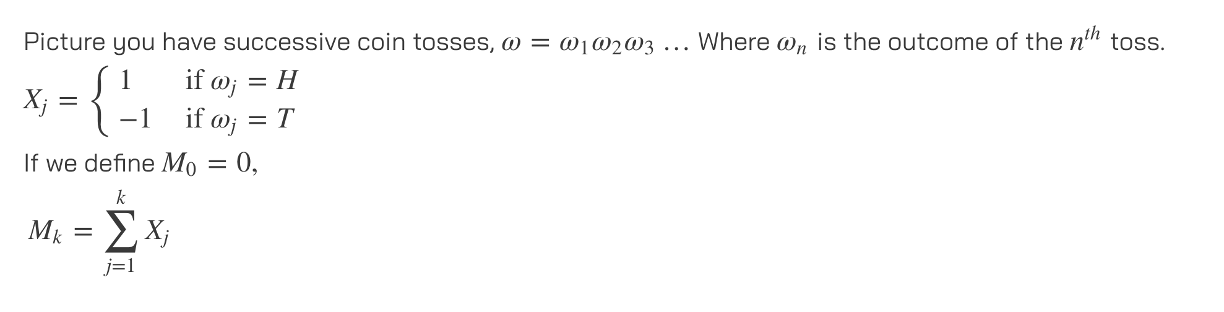

In [2]:
# Parameters
M = 10 # number of simulations per year
t = 10 # Time, numbers of years

In [3]:
random_walk = [-1, 1]
steps = np.random.choice(random_walk, size=(M,t)).T
origin = np.zeros((1,M))
rw_paths = np.concatenate([origin, steps]).cumsum(axis=0)

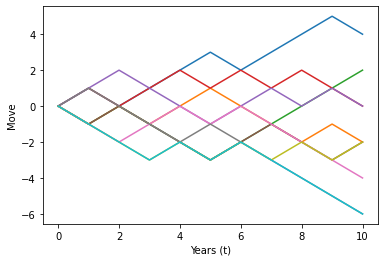

In [4]:
plt.plot(rw_paths)
plt.xlabel("Years (t)")
plt.ylabel("Move")
plt.show()

# Three important properties
<hr style = "border:2px solid black" ></hr>

## Independet increments

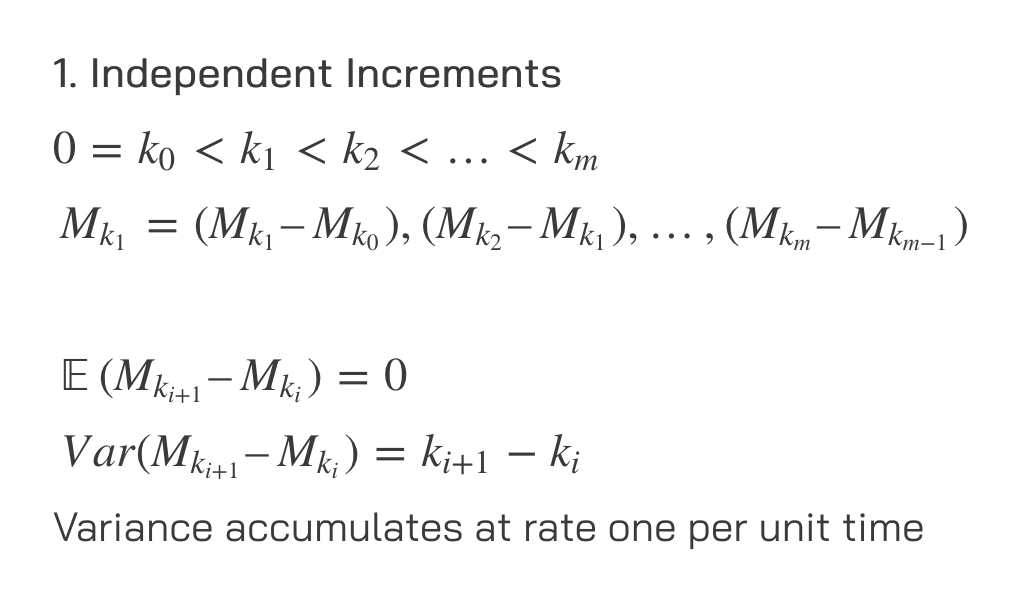

## Quadratic variation

<div class="alert alert-info">
<font color=bla ck>

- Let's prove the quadratic variation.
- You'll see how the quadratic variation is equal to the time step.
- The variance is also equal to the time at which you are. At time t=1 the vairance is equal to 1, at 2 is equal to 2 etc... Please consider this is a numerical simulation so you get almost 2.

</font>
</div>

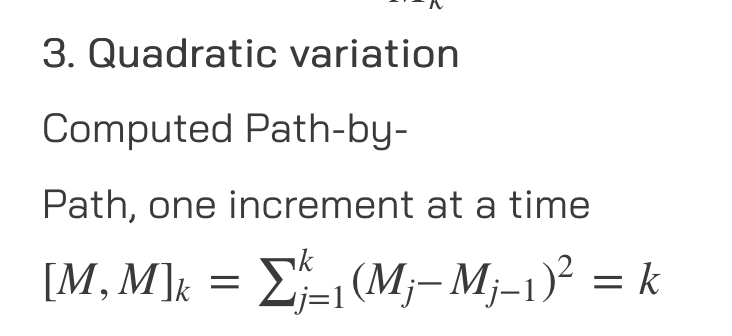

In [16]:
# Create Quadratic variation and Variance functions 
quadratic_variation = lambda x: round(np.square(x[:-1]-x[1:]).sum(),3)
variance = lambda x: round(np.var(x,axis=0),3)
[quadratic_variation(path) for path in rw_paths.T[:4]]

[10.0, 10.0, 10.0, 10.0]

## Martingale

<div class="alert alert-info">
<font color=bla ck>

- In probability theory, a martingale is a sequence of random variables (i.e., a stochastic process) for which, at a particular time, the conditional expectation of the next value in the sequence is equal to the present value, **regardless** of all prior values. 

</font>
</div>

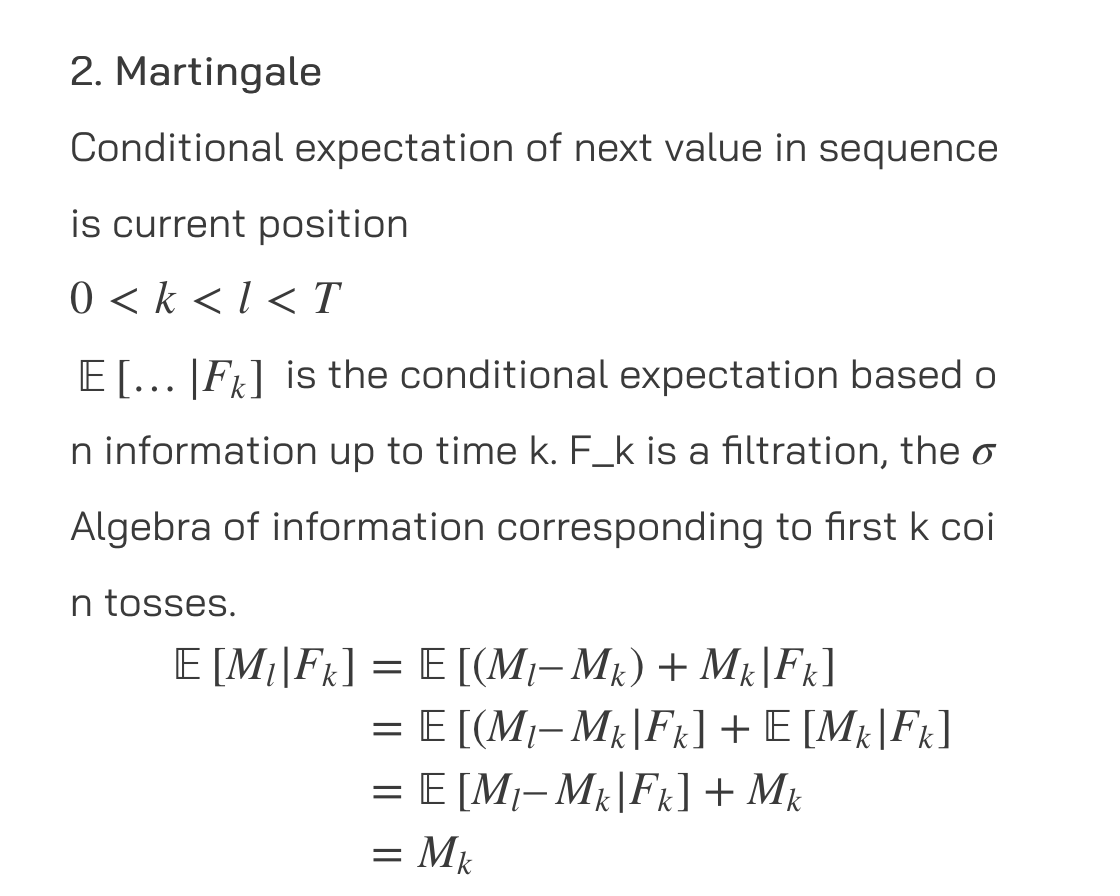

In [17]:
# Check is it is a martingale (Change the number of simulation to 100,000 to observe variance convergence on Time)
[variance(path) for path in rw_paths[1:11]]

[0.96, 1.44, 1.96, 2.44, 4.0, 2.44, 3.56, 5.8, 9.16, 9.44]

# Scaled Symmmetric Random Walk
<hr style = "border:2px solid black" ></hr>

<div class="alert alert-info">
<font color=bla ck>

- To approximate a Browian Motion we can speed up time and scale down the step size.
- The scale of the movement is now more granular when compared to a pure random symmetric random walk.
    
</font>
</div>

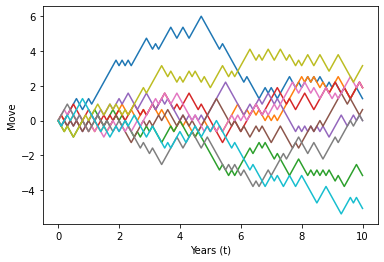

[10.0, 10.0, 10.0, 10.0]

In [6]:
# Parameters
M = 10  # number of simulations
t = 10  # Time
n = 10

random_walk = [-1, 1]
steps = (1/np.sqrt(n)) * np.random.choice(random_walk, size=(M, t*n)).T
origin = np.zeros((1, M))
srw_paths = np.concatenate([origin, steps]).cumsum(axis=0)

time = np.linspace(0, t, t*n+1)
tt = np.full(shape=(M, t*n+1), fill_value=time)
tt = tt.T
# print(np.size(tt),np.size(srw_paths))
plt.plot(tt, srw_paths)
plt.xlabel("Years (t)")
plt.ylabel("Move")
plt.show()


In [18]:
# Check is it is a martingale (Change the number of simulation to 100,000 to observe variance convergence on Time)
[variance(path) for path in srw_paths[1:11]]

[0.096, 0.16, 0.176, 0.224, 0.416, 0.304, 0.244, 0.276, 0.256, 0.356]

In [19]:
# Check the quadratic vaiation property
[quadratic_variation(path) for path in srw_paths.T[:4]]

[10.0, 10.0, 10.0, 10.0]

# Limit of Binomial Distribution
<hr style = "border:2px solid black" ></hr>

<div class="alert alert-info">
<font color=bla ck>

- As n increases, the binomial distribution converges to the normal distribution with variance t
- As I increse the granuality of the time scale, essentially what we have done above, the bar chart is going to converge to the normal distribution.
</font>
</div>

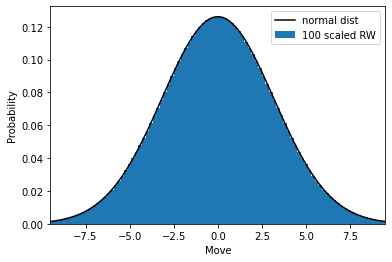

In [7]:
# Change the parameter n to see the impact of increasing the discretization
# of the random walk and how it converges on the normal distribution
n = 100
t = 10

# Combinations


def nCr(n, k):
    f = math.factorial
    return f(n) / (f(k) * f(n-k))


perms = [nCr(n*t, k)*(0.5)**(n*t) for k in range(int(n*t)+1)]


def W_nt(n, t):
    return 1/np.sqrt(n) * np.arange(-n*t, n*t+1, 2)


outcomes = W_nt(n, t)
plt.bar(outcomes, [perm/(outcomes[1]-outcomes[0]) for perm in perms], outcomes[1]-outcomes[0],
        label='{0} scaled RW'.format(n))

x = np.linspace(-3*np.sqrt(t), 3*np.sqrt(t), 100)
plt.plot(x, stats.norm.pdf(x, 0, np.sqrt(t)), 'k-', label='normal dist')

plt.xlim(-3*np.sqrt(t), 3*np.sqrt(t))
plt.ylabel("Probability")
plt.xlabel("Move")
plt.legend()
plt.show()

# Brownian Motion
<hr style = "border:2px solid black" ></hr>

In [ ]:
<div class="alert alert-info">
<font color=bla ck>

- So we have see that as we incease n, the expectation converges to zero and the variance to t.
- This is exactly what happens in a Brownian motion.

</font>
</div>

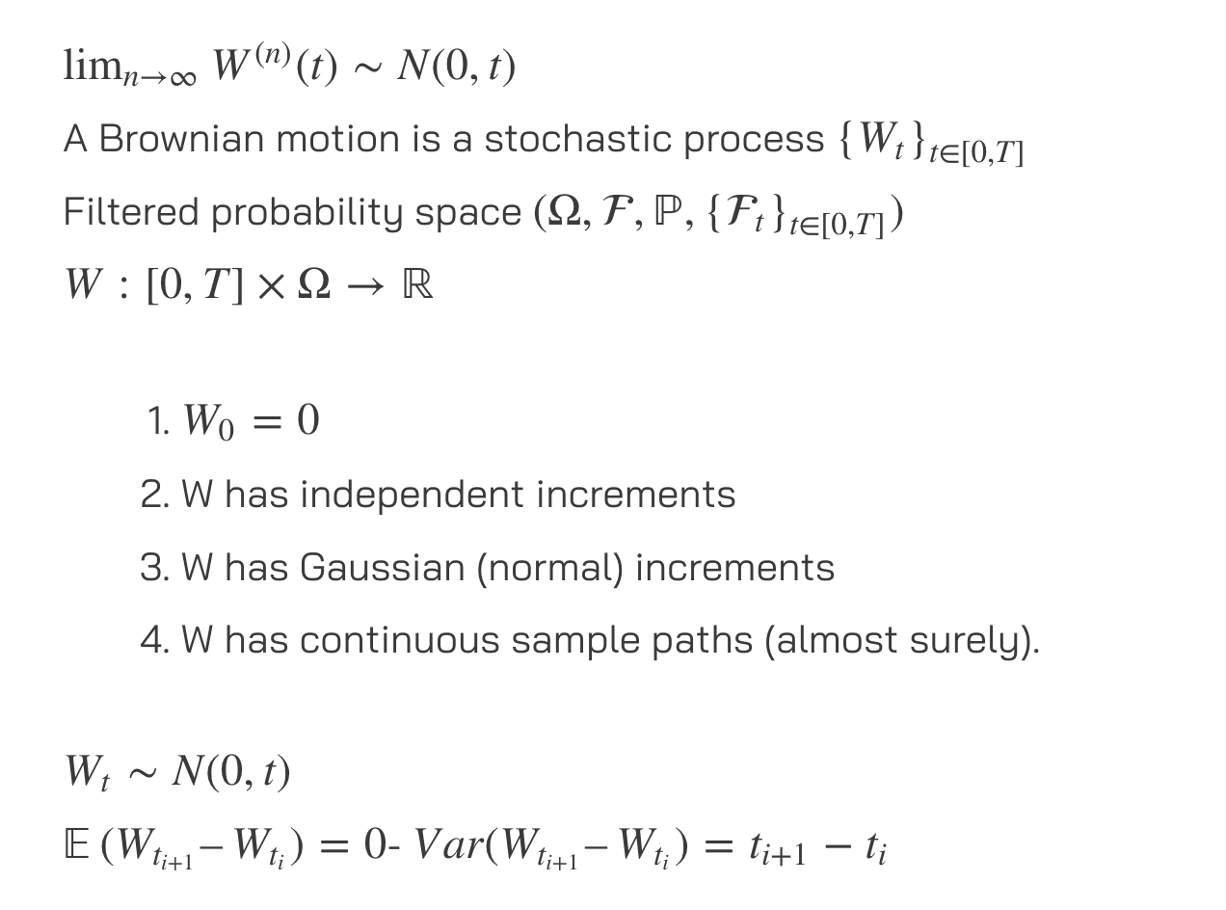

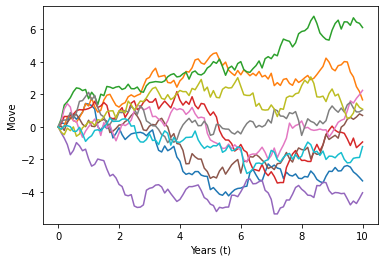

In [28]:
# Parameters
M = 10  # number of simulations
t = 10  # Time (years)
n = 100  # steps we want to see
dt = t/n  # time step

steps = np.random.normal(0, np.sqrt(dt), size=(M, n)).T
origin = np.zeros((1, M))
bm_paths = np.concatenate([origin, steps]).cumsum(axis=0)

time = np.linspace(0, t, n+1)
tt = np.full(shape=(M, n+1), fill_value=time)
tt = tt.T

plt.plot(tt, bm_paths)
plt.xlabel("Years (t)")
plt.ylabel("Move")
plt.show()



In [29]:
# change time steps to 1,000,000 to observe same quadratic variation along paths
[quadratic_variation(path) for path in bm_paths.T[:4]]

[9.684, 9.305, 9.658, 11.906]

In [30]:
# change simulations to 100,000 to observe convergence of variance to Time at a particular time step (1/10, 2/10 ...)
[variance(path) for path in bm_paths[1:11]]

[0.082, 0.383, 0.506, 0.816, 0.754, 0.803, 0.943, 1.129, 1.361, 1.376]

# References
<hr style = "border:2px solid black" ></hr>

<div class="alert alert-warning">
<font color=black>

- [This notebook oignal code](https://quantpy.com.au/stochastic-calculus/brownian-motion-for-financial-mathematics/)
- [This notebook YouTube video](https://www.youtube.com/watch?v=fIM_AQbBOm4)
- [Martingale (probability theory)](https://en.wikipedia.org/wiki/Martingale_(probability_theory))
- Machine Learning for Financial Risk Management with Python Abdullah Karasan

</font>
</div>